In [13]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/final_dataset_1.csv')
df = df.drop(columns=['Unnamed: 0'])
df.drop(df.columns[0], axis=1, inplace=True)
# g = nx.from_pandas_edgelist(df[['Source','Destination']], source='Source', target='Destination',create_using=nx.DiGraph())
# print(g)
dff=[]
for i in range(0,5):
    path='../data/final_dataset_'+str(i+1)+'.csv'
    df=pd.read_csv(path)
    df.drop(columns=['Unnamed: 0'],inplace=True)
    df.drop(0,inplace=True)
    dff.append(df)



In [96]:
# Page Rank
pr = nx.pagerank(g)
df['Page_Rank_Src'] = df.Source.apply(lambda row: pr.get(row))
df['Page_Rank_Dst'] = df.Destination.apply(lambda row: pr.get(row))



In [97]:
# Shortest Path
def get_shortest_path(x, y):
    d = -1
    try:
        if g.has_edge(x, y):
            g.remove_edge(x, y)
            d = nx.shortest_path_length(g, source=x, target=y)
            g.add_edge(x, y)
        else:
            d = nx.shortest_path_length(g, source=x, target=y)
    except:
        d = -1
    return d

df['Shortest_Path'] = df.apply(lambda row: get_shortest_path(row['Source'], row['Destination']), axis = 1)
print(g)


DiGraph with 1002 nodes and 434 edges


In [98]:
df.head(10)

,Source,Destination,Class,Page_Rank_Src,Page_Rank_Dst,Shortest_Path
0,Source,Target,1,0.001205,0.002399,-1
1,4135,291716,1,0.000640,0.001220,-1
2,102646,11606,1,0.000449,0.001668,-1
3,102646,291908,1,0.000449,0.000641,-1
4,14602,11267,1,0.000689,0.002050,5
5,14602,33404,1,0.000689,0.001177,-1
6,14602,33443,1,0.000689,0.001278,-1
7,14602,10986,1,0.000689,0.000597,-1
8,8585,9107,1,0.001157,0.005605,-1
9,33404,361857,1,0.001177,0.000888,2


In [99]:
# Follow Features
followers_src, followers_dst, followees_src, followees_dst, int_followers, int_followees = [], [], [], [], [], []

for i, r in df.iterrows():
    pre_src = set(g.predecessors(r['Source'])) if set(g.predecessors(r['Source'])) else set()
    suc_src = set(g.successors(r['Source'])) if set(g.successors(r['Source'])) else set()

    pre_dst = set(g.predecessors(r['Destination'])) if set(g.predecessors(r['Destination'])) else set()
    suc_dst = set(g.successors(r['Destination'])) if set(g.successors(r['Destination'])) else set()

    followers_src.append(len(pre_src))
    followees_src.append(len(suc_src))

    followers_dst.append(len(pre_dst))
    followees_dst.append(len(suc_dst))

    int_followers.append(len(pre_src.intersection(pre_dst)))
    int_followees.append(len(suc_src.intersection(suc_dst)))
        
df['Followers_Src'] = followers_src
df['Followees_Src'] = followees_src
df['Followers_Dst'] = followers_dst
df['Followees_Dst'] = followees_dst
df['Int_Followers'] = int_followers
df['Int_Followees'] = int_followees

In [100]:
def mutal_follow(a,b):
    if(g.has_edge(b,a)):
        return 1
    else:
        return 0

df['Mutual_Follow']=df.apply(lambda row:
                           mutal_follow(row['Source'],row['Destination']),axis=1)



In [101]:
df.head(5)

,Source,Destination,Class,Page_Rank_Src,Page_Rank_Dst,Shortest_Path,Followers_Src,Followees_Src,Followers_Dst,Followees_Dst,Int_Followers,Int_Followees,Mutual_Follow
0,Source,Target,1,0.001205,0.002399,-1,0,0,0,0,0,0,0
1,4135,291716,1,0.000640,0.001220,-1,0,0,0,0,0,0,0
2,102646,11606,1,0.000449,0.001668,-1,0,0,1,0,0,0,0
3,102646,291908,1,0.000449,0.000641,-1,0,0,0,0,0,0,0
4,14602,11267,1,0.000689,0.002050,5,0,1,2,0,0,0,0


In [102]:
def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(g.successors(a)).intersection(set(g.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(g.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0
    
df['Adar_Index'] = df.apply(lambda row: calc_adar_in(row['Source'], row['Destination']), axis = 1)


TypeError: can only concatenate str (not "int") to str

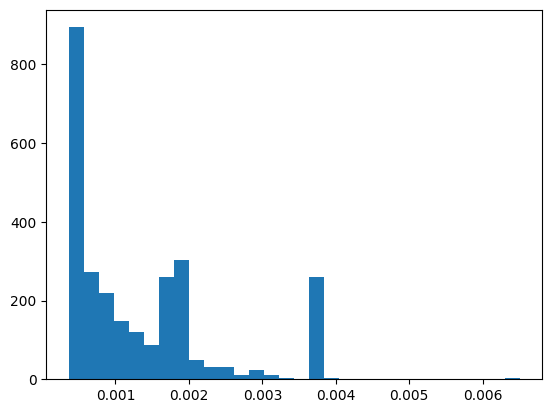

In [17]:

for i,df in enumerate(dff):
    
    plt.hist(df['Page_Rank_Src'], bins=30)
    plt.title('Histogram of Page Rank of Source Nodes '+str(i))
    plt.xlabel('Page Rank Values')
    plt.ylabel('Count')
    plt.show()


    plt.hist(df['Page_Rank_Dst'], bins=30)
    plt.title('Histogram of Page Rank of Dest Nodes '+str(i))
    plt.xlabel('Page Rank Values')
    plt.ylabel('Count')
    plt.show()





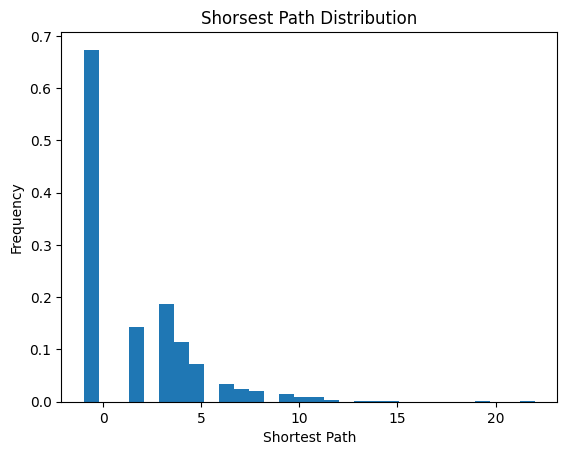

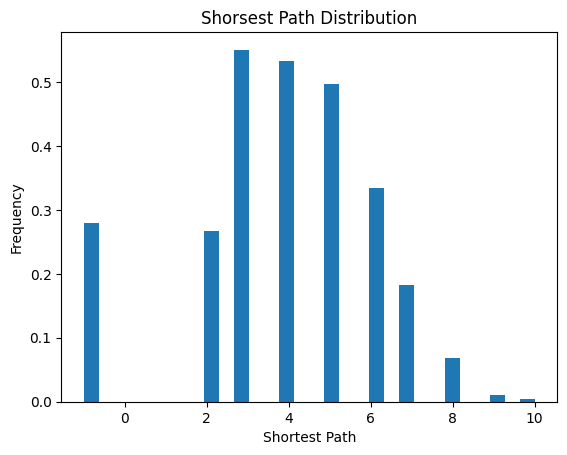

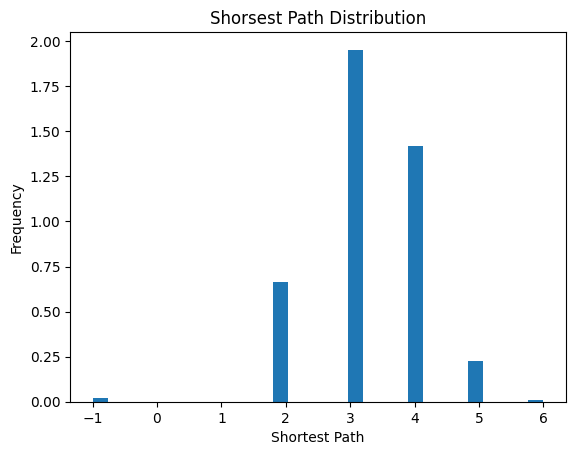

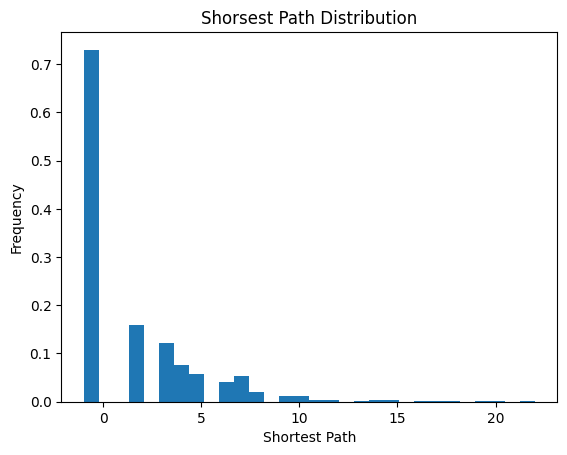

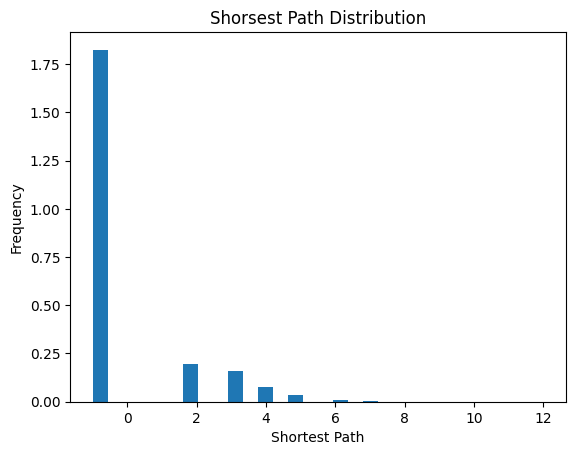

In [14]:
for df in dff:
    plt.hist(df['Shortest_Path'], bins=30, density=True)
    plt.title('Shorsest Path Distribution')
    plt.xlabel('Shortest Path')
    plt.ylabel('Frequency')
    plt.show()



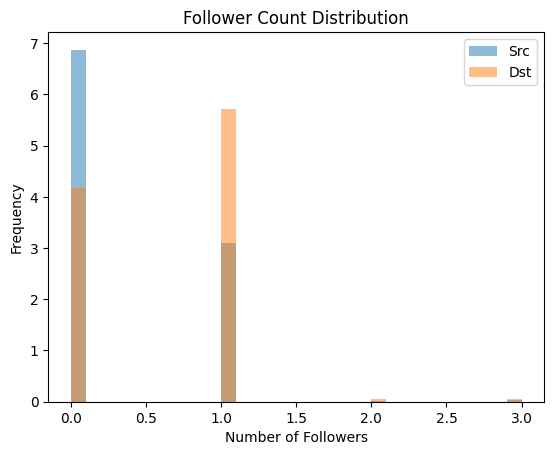

In [105]:
plt.hist(df['Followers_Src'], bins=30, alpha=0.5,density=True,label='Src')
plt.hist(df['Followers_Dst'], bins=30, alpha=0.5,density=True,label='Dst')

plt.title('Follower Count Distribution')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.legend()
plt.show()


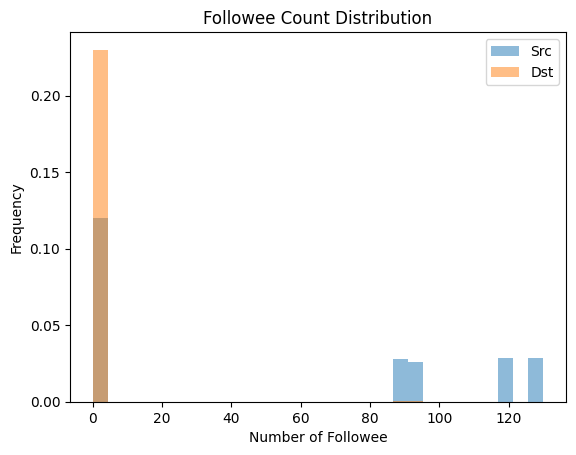

In [106]:
plt.hist(df['Followees_Src'], bins=30, alpha=0.5,density=True,label='Src')
plt.hist(df['Followees_Dst'], bins=30, alpha=0.5,density=True,label='Dst')

plt.title('Followee Count Distribution')
plt.xlabel('Number of Followee')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [107]:
total_mutual=df['Mutual_Follow'].sum()
mutual_percent=total_mutual/3230
total_mutual

0

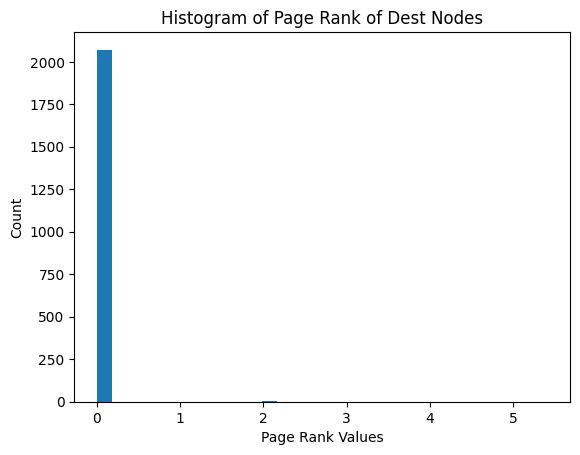

In [108]:
plt.hist(df['Adar_Index'], bins=30)
plt.title('Histogram of Page Rank of Dest Nodes')
plt.xlabel('Page Rank Values')
plt.ylabel('Count')
plt.show()


In [109]:
(df['Adar_Index']!= 0).sum()/3230


0.0009287925696594427

In [110]:
gn=nx.non_edges(g)

In [111]:
len(list(gn))

1002568

In [112]:
df.to_csv('./data/final_dataset_5.csv')